### Day 22: Reactor Reboot

Operating at these extreme ocean depths has overloaded the submarine's reactor; it needs to be rebooted.

The reactor core is made up of a large 3-dimensional grid made up entirely of cubes, one cube per integer 3-dimensional coordinate (x,y,z). Each cube can be either on or off; at the start of the reboot process, they are all off. (Could it be an old model of a reactor you've seen before?)

To reboot the reactor, you just need to set all of the cubes to either on or off by following a list of reboot steps (your puzzle input). Each step specifies a cuboid (the set of all cubes that have coordinates which fall within ranges for x, y, and z) and whether to turn all of the cubes in that cuboid on or off.

For example, given these reboot steps:

    on x=10..12,y=10..12,z=10..12
    on x=11..13,y=11..13,z=11..13
    off x=9..11,y=9..11,z=9..11
    on x=10..10,y=10..10,z=10..10
    
The first step (on x=10..12,y=10..12,z=10..12) turns on a 3x3x3 cuboid consisting of 27 cubes:

    10,10,10
    10,10,11
    10,10,12
    10,11,10
    10,11,11
    10,11,12
    10,12,10
    10,12,11
    10,12,12
    11,10,10
    11,10,11
    11,10,12
    11,11,10
    11,11,11
    11,11,12
    11,12,10
    11,12,11
    11,12,12
    12,10,10
    12,10,11
    12,10,12
    12,11,10
    12,11,11
    12,11,12
    12,12,10
    12,12,11
    12,12,12
    
The second step (on x=11..13,y=11..13,z=11..13) turns on a 3x3x3 cuboid that overlaps with the first. As a result, only 19 additional cubes turn on; the rest are already on from the previous step:

    11,11,13
    11,12,13
    11,13,11
    11,13,12
    11,13,13
    12,11,13
    12,12,13
    12,13,11
    12,13,12
    12,13,13
    13,11,11
    13,11,12
    13,11,13
    13,12,11
    13,12,12
    13,12,13
    13,13,11
    13,13,12
    13,13,13
    
The third step (off x=9..11,y=9..11,z=9..11) turns off a 3x3x3 cuboid that overlaps partially with some cubes that are on, ultimately turning off 8 cubes:

    10,10,10
    10,10,11
    10,11,10
    10,11,11
    11,10,10
    11,10,11
    11,11,10
    11,11,11
    
The final step (on x=10..10,y=10..10,z=10..10) turns on a single cube, 10,10,10. After this last step, 39 cubes are on.

The initialization procedure only uses cubes that have x, y, and z positions of at least -50 and at most 50. For now, ignore cubes outside this region.

Here is a larger example:

    on x=-20..26,y=-36..17,z=-47..7
    on x=-20..33,y=-21..23,z=-26..28
    on x=-22..28,y=-29..23,z=-38..16
    on x=-46..7,y=-6..46,z=-50..-1
    on x=-49..1,y=-3..46,z=-24..28
    on x=2..47,y=-22..22,z=-23..27
    on x=-27..23,y=-28..26,z=-21..29
    on x=-39..5,y=-6..47,z=-3..44
    on x=-30..21,y=-8..43,z=-13..34
    on x=-22..26,y=-27..20,z=-29..19
    off x=-48..-32,y=26..41,z=-47..-37
    on x=-12..35,y=6..50,z=-50..-2
    off x=-48..-32,y=-32..-16,z=-15..-5
    on x=-18..26,y=-33..15,z=-7..46
    off x=-40..-22,y=-38..-28,z=23..41
    on x=-16..35,y=-41..10,z=-47..6
    off x=-32..-23,y=11..30,z=-14..3
    on x=-49..-5,y=-3..45,z=-29..18
    off x=18..30,y=-20..-8,z=-3..13
    on x=-41..9,y=-7..43,z=-33..15
    on x=-54112..-39298,y=-85059..-49293,z=-27449..7877
    on x=967..23432,y=45373..81175,z=27513..53682
    
The last two steps are fully outside the initialization procedure area; all other steps are fully within it. After executing these steps in the initialization procedure region, 590784 cubes are on.

Execute the reboot steps. Afterward, considering only cubes in the region x=-50..50,y=-50..50,z=-50..50, how many cubes are on?

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def draw_cuboids(rules):

    # prepare some coordinates
    axes = (50, 50, 50)
    x, y, z = np.indices(axes)

    # draw cuboids in the top left and bottom right corners, and a link between
    # them

    voxelarray = np.zeros(axes, dtype=bool)
    C = np.empty(voxelarray.shape, dtype=object)
    colors = ['red', 'blue', 'green']

    _, min_x, max_x, min_y, max_y, min_z, max_z = rules[0]
    
    for i, (state, x1, x2, y1, y2, z1, z2) in enumerate(rules):

        cuboid = (x1 <= x) & (x <= x2)
        cuboid &= (y1 <= y) & (y <= y2) 
        cuboid &= (z1 <= z) & (z <= z2)

        voxelarray |= cuboid
        C[cuboid] = 'blue' if state == 1 else 'red'
        
        min_x, min_y, min_z = min(min_x, x1, x2), min(min_y, y1, y2), min(min_z, z1, z2) 
        max_x, max_y, max_z = max(max_x, x1, x2), max(max_y, y1, y2), max(max_z, z1, z2) 


    # and plot everything
    ax = plt.figure(figsize=(10, 10)).add_subplot(projection='3d')
    ax.voxels(voxelarray, facecolors=C, edgecolor='k', alpha=.8)

    ax.set_xlim(min_x, max_x + 1)
    ax.set_ylim(min_y, max_y + 1)
    ax.set_zlim(min_z, max_z + 1)
    
    plt.show()

In [2]:
def parse(rules):
    rules_parsed = []
    for rule in rules:

        state, limits = rule.split(' ')
        state = 1 if state == 'on' else -1
        limits = limits.split(',')
        x_min, x_max = limits[0][2:].split('..')
        y_min, y_max = limits[1][2:].split('..')
        z_min, z_max = limits[2][2:].split('..')

        rules_parsed.append((state, int(x_min), int(x_max), int(y_min), int(y_max), int(z_min), int(z_max)))
        
    return rules_parsed

In [3]:
example = """on x=10..12,y=10..12,z=10..12
on x=11..13,y=11..13,z=11..13
off x=9..11,y=9..11,z=9..11""".split('\n')

example = parse(example)

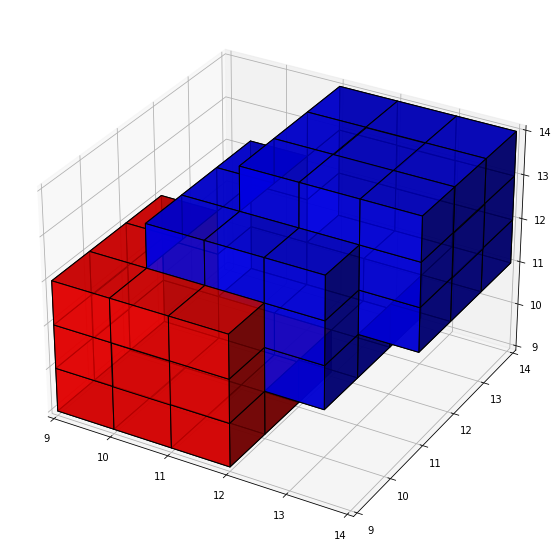

In [4]:
# Blue is for cuboids ON. Red are the cuboids that are OFF. 
draw_cuboids(example)

In [5]:
with open('data/advent_22.txt', 'r') as f:
    data = f.read().rstrip('\n').split('\n')

rules = parse(data)

In [6]:
from dataclasses import dataclass

@dataclass
class Cuboid:
    state: int
    x1: int
    x2: int
    y1: int
    y2: int
    z1: int
    z2: int
        
    def intersection(self, cuboid):        
        res = Cuboid(
            -cuboid.state,
            max(self.x1, cuboid.x1),
            min(self.x2, cuboid.x2),
            max(self.y1, cuboid.y1),
            min(self.y2, cuboid.y2),
            max(self.z1, cuboid.z1),
            min(self.z2, cuboid.z2)
        )
        
        if res.x1 <= res.x2 and res.y1 <= res.y2 and res.z1 <= res.z2:
            return res
        
    def area(self):
        a = self.x2 - self.x1 + 1
        a *= self.y2 - self.y1 + 1
        a *= self.z2 - self.z1 + 1
        
        return self.state * a

In [7]:
def reboot(rules):

    cuboids = [Cuboid(*rule) for rule in rules]

    cores = []
    for cuboid in cuboids:
        to_add = [cuboid] if cuboid.state == 1 else []

        for core in cores:
            res = cuboid.intersection(core)
            if res is not None:
                to_add.append(res)

        cores += to_add

    return cores

In [8]:
rules_p1 = [rule for rule in rules if not any([abs(p) > 50 for p in rule])]

cores = reboot(rules_p1)
total = sum([core.area() for core in cores])

In [9]:
print(f"Solution: After the reboot there are {total} cuboids on.")

Solution: After the reboot there are 623748 cuboids on.


<br>

### Part Two 

Now that the initialization procedure is complete, you can reboot the reactor.

Starting with all cubes off, run all of the reboot steps for all cubes in the reactor.

Consider the following reboot steps:

    on x=-5..47,y=-31..22,z=-19..33
    on x=-44..5,y=-27..21,z=-14..35
    on x=-49..-1,y=-11..42,z=-10..38
    on x=-20..34,y=-40..6,z=-44..1
    off x=26..39,y=40..50,z=-2..11
    on x=-41..5,y=-41..6,z=-36..8
    off x=-43..-33,y=-45..-28,z=7..25
    on x=-33..15,y=-32..19,z=-34..11
    off x=35..47,y=-46..-34,z=-11..5
    on x=-14..36,y=-6..44,z=-16..29
    on x=-57795..-6158,y=29564..72030,z=20435..90618
    on x=36731..105352,y=-21140..28532,z=16094..90401
    on x=30999..107136,y=-53464..15513,z=8553..71215
    on x=13528..83982,y=-99403..-27377,z=-24141..23996
    on x=-72682..-12347,y=18159..111354,z=7391..80950
    on x=-1060..80757,y=-65301..-20884,z=-103788..-16709
    on x=-83015..-9461,y=-72160..-8347,z=-81239..-26856
    on x=-52752..22273,y=-49450..9096,z=54442..119054
    on x=-29982..40483,y=-108474..-28371,z=-24328..38471
    on x=-4958..62750,y=40422..118853,z=-7672..65583
    on x=55694..108686,y=-43367..46958,z=-26781..48729
    on x=-98497..-18186,y=-63569..3412,z=1232..88485
    on x=-726..56291,y=-62629..13224,z=18033..85226
    on x=-110886..-34664,y=-81338..-8658,z=8914..63723
    on x=-55829..24974,y=-16897..54165,z=-121762..-28058
    on x=-65152..-11147,y=22489..91432,z=-58782..1780
    on x=-120100..-32970,y=-46592..27473,z=-11695..61039
    on x=-18631..37533,y=-124565..-50804,z=-35667..28308
    on x=-57817..18248,y=49321..117703,z=5745..55881
    on x=14781..98692,y=-1341..70827,z=15753..70151
    on x=-34419..55919,y=-19626..40991,z=39015..114138
    on x=-60785..11593,y=-56135..2999,z=-95368..-26915
    on x=-32178..58085,y=17647..101866,z=-91405..-8878
    on x=-53655..12091,y=50097..105568,z=-75335..-4862
    on x=-111166..-40997,y=-71714..2688,z=5609..50954
    on x=-16602..70118,y=-98693..-44401,z=5197..76897
    on x=16383..101554,y=4615..83635,z=-44907..18747
    off x=-95822..-15171,y=-19987..48940,z=10804..104439
    on x=-89813..-14614,y=16069..88491,z=-3297..45228
    on x=41075..99376,y=-20427..49978,z=-52012..13762
    on x=-21330..50085,y=-17944..62733,z=-112280..-30197
    on x=-16478..35915,y=36008..118594,z=-7885..47086
    off x=-98156..-27851,y=-49952..43171,z=-99005..-8456
    off x=2032..69770,y=-71013..4824,z=7471..94418
    on x=43670..120875,y=-42068..12382,z=-24787..38892
    off x=37514..111226,y=-45862..25743,z=-16714..54663
    off x=25699..97951,y=-30668..59918,z=-15349..69697
    off x=-44271..17935,y=-9516..60759,z=49131..112598
    on x=-61695..-5813,y=40978..94975,z=8655..80240
    off x=-101086..-9439,y=-7088..67543,z=33935..83858
    off x=18020..114017,y=-48931..32606,z=21474..89843
    off x=-77139..10506,y=-89994..-18797,z=-80..59318
    off x=8476..79288,y=-75520..11602,z=-96624..-24783
    on x=-47488..-1262,y=24338..100707,z=16292..72967
    off x=-84341..13987,y=2429..92914,z=-90671..-1318
    off x=-37810..49457,y=-71013..-7894,z=-105357..-13188
    off x=-27365..46395,y=31009..98017,z=15428..76570
    off x=-70369..-16548,y=22648..78696,z=-1892..86821
    on x=-53470..21291,y=-120233..-33476,z=-44150..38147
    off x=-93533..-4276,y=-16170..68771,z=-104985..-24507
    
After running the above reboot steps, 2758514936282235 cubes are on. (Just for fun, 474140 of those are also in the initialization procedure region.)

Starting again with all cubes off, execute all reboot steps. Afterward, considering all cubes, how many cubes are on?

In [10]:
cores = reboot(rules)
total = sum([core.area() for core in cores])

In [11]:
print(f"Solution: After the reboot there are {total} cuboids on.")

Solution: After the reboot there are 1227345351869476 cuboids on.
